## Wprowadzenie
Skrypt pokazuje jak użyć pakietu SciKit do grupowania danych. Rozważane są dwa przykłady: dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich oraz dane IRIS.

In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
import pprint
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

In [2]:
from clustering_indexex import (davies_bouldin_index, dunn_index)

def plotClustering(X, plt_labels, features=(0,1), ax=plt):
    if features[0] == features[1]:
        ax.hist(
            X[:, features[0]],
            edgecolor='black'
        )
    else:
        ax.scatter(
            X[:,features[0]],
            X[:,features[1]],
            c=plt_labels,
            edgecolor='black'
        )

def positive_labels(labels):
    if np.any(labels < 0):
        return labels + np.abs(np.min(labels))
    return labels
    


def count_metrics(X, labels, centroids=None):
    pprint.pprint({
        'Silhouette': metrics.silhouette_score(X, labels, metric='euclidean'),
        'dunn_index': dunn_index(X, labels, centroids),
        'davies_bouldin_index': davies_bouldin_index(X, labels, centroids)
    })

## 1. Pierwszy zestaw danych
Dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich

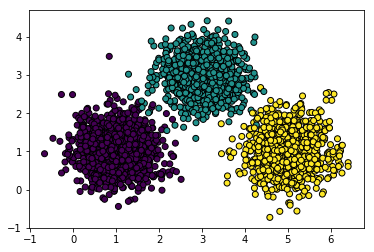

In [3]:
from sklearn import datasets

centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(
    n_samples=3000,
    n_features=2,
    centers=centers_,
    cluster_std=0.5
)

plotClustering(X, labels)

### Grupowanie za pomocą KMeans

{'Silhouette': 0.6733114354723273,
 'davies_bouldin_index': 0.49948590088751627,
 'dunn_index': 0.019851046468762332}
{'Silhouette': 0.6733114354723273,
 'davies_bouldin_index': 0.49948590088751627,
 'dunn_index': 0.019851046468762332}
{'Silhouette': 0.6733114354723273,
 'davies_bouldin_index': 0.49948590088751627,
 'dunn_index': 0.019851046468762332}


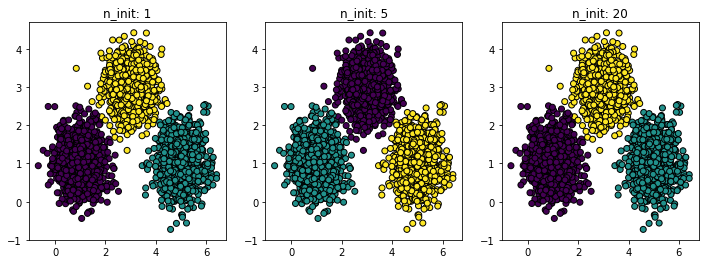

In [4]:
# sma
# n-init: Number of time the k-means algorithm will be run with different centroid
#         seeds. The final results will be the best output of n_init consecutive
#         runs in terms of inertia.
fig, axes = plt.subplots(1,3)
fig.set_size_inches(12,4)
for ax, n_init in zip(axes, [1,5,20]):
    k_means = KMeans(
        init='k-means++',
        n_clusters=3,
        n_init=n_init
    )
    k_means.fit(X)
    plotClustering(X, k_means.labels_, ax=ax)
    ax.set_title(f'n_init: {n_init}')
    count_metrics(X, k_means.labels_, k_means.cluster_centers_)

### Grupowanie za pomocą MiniBatchKMeans

#### mini_batch_k_means = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=100, n_init=1, max_no_improvement=10, verbose=0, random_state=0)
mini_batch_k_means.fit(X)

plotClustering(X, mini_batch_k_means.labels_)
count_metrics(X, mini_batch_k_means.labels_, mini_batch_k_means.cluster_centers_)

### Grupowanie za pomocą Birch bez wtórnego grupowania

{'Silhouette': 0.28846732012565574,
 'davies_bouldin_index': 1.0615777177716346,
 'dunn_index': 0.002264042455228028}
{'Silhouette': 0.29801369518132415,
 'davies_bouldin_index': 0.97332011753958703,
 'dunn_index': 0.0051614792114387867}
{'Silhouette': 0.43007051164337506,
 'davies_bouldin_index': 1.2347418693058982,
 'dunn_index': 0.0030011011406004895}
{'Silhouette': 0.53250062008058152,
 'davies_bouldin_index': 0.97664365742280512,
 'dunn_index': 0.0057382810222767755}


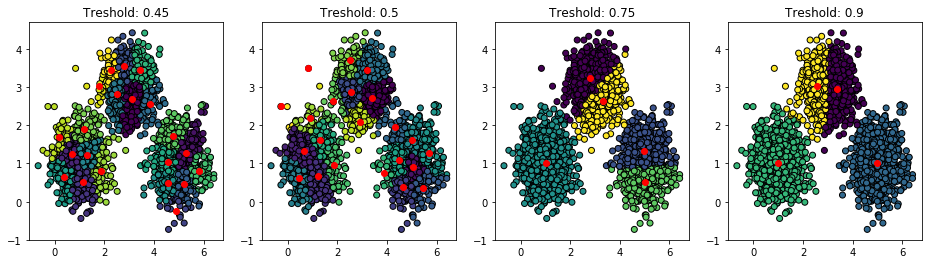

In [5]:
# threshold [float, default 0.5]:
#     The radius of the subcluster obtained by
#     merging a new sample and the closest subcluster should be lesser than the threshold.
#     Otherwise a new subcluster is started.
#     Setting this value to be very low promotes splitting and vice-versa.

fig, axes = plt.subplots(1,4)
fig.set_size_inches(16,4)
for ax, threshold in zip(axes, [0.45, 0.5, 0.75, 0.9]):
    birch = Birch(threshold=threshold, n_clusters=None)
    birch.fit(X)
    plotClustering(X, birch.labels_, ax=ax)
    centers = birch.root_.centroids_
    ax.scatter(centers[:, 0], centers[:, 1], c='r')
    ax.set_title(f'Treshold: {threshold}')
    count_metrics(X, birch.labels_, birch.subcluster_centers_)



(2, 2)


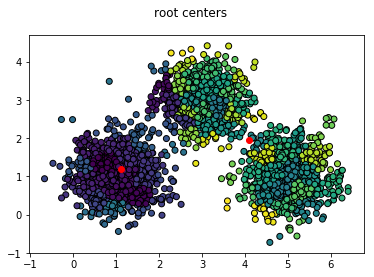

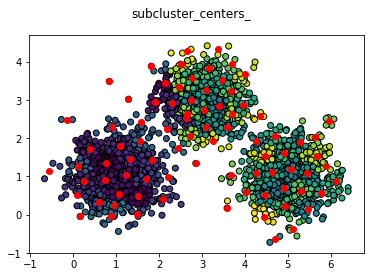

In [10]:
birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(X)


plotClustering(X, birch.labels_)
centers = birch.root_.centroids_
print(centers.shape)
plt.scatter(centers[:, 0], centers[:, 1], c='r')
plt.suptitle('root centers')
plt.show()
# plt.set_title(f'Birch treshold: 0.25')

plotClustering(X, birch.labels_)
centers = birch.subcluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='r')
plt.suptitle('subcluster_centers_')
plt.show()

### Grupowanie za pomocą Birch z wtórnym grupowaniem

In [ ]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

plotClustering(X, birch.labels_)
count_metrics(X, birch.labels_, birch.root_.centroids_)


### Grupowanie za pomocą DBScan

In [ ]:
# eps [float, optional] 
#     The maximum distance between two samples for them to be considered as
#     in the same neighborhood.
fig, axes = plt.subplots(1,5)
fig.set_size_inches(20,4)
for ax, eps in zip(axes, [0.1, 0.2, 0.3, 0.4, 0.5]):
    dbscan = DBSCAN(eps=eps, min_samples=25)
    dbscan.fit(X)
    plotClustering(X, dbscan.labels_, ax=ax)
    ax.set_title(f'eps: {eps}')
    ax.scatter(
        X[dbscan.labels_ == -1][:,0],
        X[dbscan.labels_ == -1][:,1],
        c='red'
    )
    labels = positive_labels(dbscan.labels_)
    centers = np.empty((X.shape[1],np.unique(labels).size))
    for i in range(np.unique(labels).shape[0] -1):
        l = X.T[:,labels == i]
        centers[:,i] = np.sum(l, axis=1)/l.shape[1]
    count_metrics(X, labels, centers.T)
    


## 2. Drugi zestaw danych
Dane IRIS

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)
fig, axes = plt.subplots(X.shape[-1], X.shape[-1])
fig.set_size_inches(12,12)
for i in range(X.shape[-1]):
    for j in range(X.shape[-1]):
        plotClustering(X, k_means.labels_, features=(i,j), ax=axes[i][j])

for i in range(X.shape[-1]):
    axes[X.shape[-1] - 1][i].set_xlabel(iris.feature_names[i]) 
    axes[i][0].set_ylabel(iris.feature_names[i])
       

In [ ]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)
fig, axes = plt.subplots(X.shape[-1], X.shape[-1])
fig.set_size_inches(12,12)
for i in range(X.shape[-1]):
    for j in range(X.shape[-1]):
        plotClustering(X, birch.labels_, features=(i,j), ax=axes[i][j])
for i in range(X.shape[-1]):
    axes[X.shape[-1] - 1][i].set_xlabel(iris.feature_names[i]) 
    axes[i][0].set_ylabel(iris.feature_names[i])


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

fig, axes = plt.subplots(X.shape[-1], X.shape[-1])
fig.set_size_inches(12,12)
for i in range(X.shape[-1]):
    for j in range(X.shape[-1]):
        plotClustering(X, dbscan.labels_, features=(i,j), ax=axes[i][j])
for i in range(X.shape[-1]):
    axes[X.shape[-1] - 1][i].set_xlabel(iris.feature_names[i]) 
    axes[i][0].set_ylabel(iris.feature_names[i])
    


In [ ]:
# for t in [
#     k_means,
#     birch,
#     dbscan
# ]:
#     count_metrics(X, t.labels_)
labels_db = positive_labels(dbscan.labels_)
centers_db = np.empty((X.shape[1], np.unique(labels_db).size)).T
for i in range(np.unique(labels_db).size):
    l = X[labels_db == i, :]
    centers_db[i, :] = l.mean(axis=0)
count_metrics(X, k_means.labels_, k_means.cluster_centers_)
count_metrics(X, birch.labels_, birch.root_.centroids_)
count_metrics(X, labels_db, centers_db)

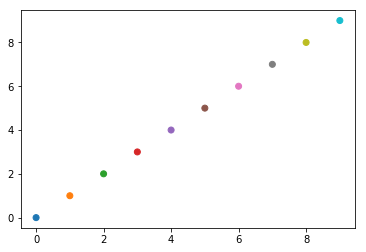

In [17]:
X = np.arange(10)
plt.scatter(X,X,c=X, cmap='tab10')